<a href="https://colab.research.google.com/github/tahrul/test_rep/blob/master/H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to supporting video for below notebook walkhthrough - https://www.youtube.com/watch?v=91QljBnvM7s

In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Sat Feb 22 08:34:14 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 21 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=61734663c5a8f2187d51a3964b7608eb5ea185625b41f0699eeea4e87a325d01
  Stored in directory: /root/.cache/pip/wheels/62/f9/aa/687bd54342d2981bc78e22ee9b9bc39f92006e344e7aa1e0ac
Successfully built h2o


In [4]:
 import h2o

In [5]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.26" 2025-01-21; OpenJDK Runtime Environment (build 11.0.26+4-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.26+4-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmhdylg50
  JVM stdout: /tmp/tmpmhdylg50/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmhdylg50/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,3 months and 20 days
H2O_cluster_name:,H2O_from_python_unknownUser_mhh68e
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
churn_df.types

{'customerID': 'string',
 'gender': 'enum',
 'SeniorCitizen': 'int',
 'Partner': 'enum',
 'Dependents': 'enum',
 'tenure': 'int',
 'PhoneService': 'enum',
 'MultipleLines': 'enum',
 'InternetService': 'enum',
 'OnlineSecurity': 'enum',
 'OnlineBackup': 'enum',
 'DeviceProtection': 'enum',
 'TechSupport': 'enum',
 'StreamingTV': 'enum',
 'StreamingMovies': 'enum',
 'Contract': 'enum',
 'PaperlessBilling': 'enum',
 'PaymentMethod': 'enum',
 'MonthlyCharges': 'real',
 'TotalCharges': 'real',
 'Churn': 'enum'}

In [9]:
churn_df.describe()

Rows:7043
Cols:21

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
type,string,enum,int,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,NaN,,0.0,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,NaN,,0.1621468124378816,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.300440841865,
maxs,NaN,,1.0,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,NaN,,0.3686116056100131,,,24.559481023094456,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,0,,5901,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [11]:
churn_train

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.1,1949.4,No
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.5,2686.05,No


In [12]:
y = "Churn"
x = churn_df.columns
x.remove(y)
x.remove("customerID")

In [13]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)


In [14]:
!nvidia-smi

Sat Feb 22 08:38:26 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
08:38:34.594: Project: AutoML_1_20250222_83834
08:38:34.596: Cross-validation disabled by user: no fold column nor nfolds > 1.
08:38:34.596: Setting stopping tolerance adaptively based on the training frame: 0.014237850952891042
08:38:34.597: Build control seed: 10
08:38:34.597: training frame: Frame key: AutoML_1_20250222_83834_training_py_2_sid_8987    cols: 21    rows: 4933  chunks: 8    size: 266384  checksum: 4600606889894867136
08:38:34.598: validation frame: Frame key: py_4_sid_8987    cols: 21    rows: 1054  chunks: 8    size: 138894  checksum: 8873014070027709109
08:38:34.598: leaderboard frame: Frame key: py_4_sid_8987    cols: 21    rows: 1054  chunks: 8    size: 138894  checksum: 8873014070027709109
08:38:34.598: blending frame: NULL
08:38:34.598: response column: Churn
08:38:34.598: fold column: null
08:38:34.598: weights column: null
08:38:34.618: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), 

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250222_83834


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    45                 45                          19215                  6            12           8.51111       27            33            29.2222

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.11607776248387927
RMSE: 0.3407018674499441
LogLoss: 0.3625585718940754
Mean Per-Class Error: 0.19053487772835376
AUC: 0.8908675394019272
AUCPR: 0.7414741248569936
Gini: 0.7817350788038544

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3245243337270257
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3010  618    0.1703   (618.0/3628.0)
Yes    275   1030   0.2107   (275.0/1305.0)
Total  3285  1648   0.181    (893.0/4933.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.324524     0.697596  211
max f2                       0.158143     0.785733  291
max f0point5                 0.524964     0.694739  133
max accuracy                 0.433752     0.8358    167
max precision                0.922332     1         0
max recall                   0.0231307    1         383
max specificity              0.922332     1         0
max absolute_mcc             0.324524     0.578808  211
max min_per_class_accuracy   0.302194     0.808159  222
max mean_per_class_accuracy  0.286797     0.810921  228
max tns                      0.922332     3628      0
max fns                      0.922332     1304      0
max fps                      0.00772192   3628      399
max tps                      0.0231307    1305      383
max tnr                      0.922332     1         0
max fnr                      0.922332     0.999234  0
max fpr                      0.00772192   1         399
max tpr                      0.0231307    1         383

Gains/Lift Table: Avg response rate: 26.45 %, avg score: 26.39 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101358                   0.867126           3.47767   3.47767            0.92             0.881648   0.92                        0.881648            0.035249        0.035249                   247.767   247.767            0.0341465
2        0.0200689                   0.841104           3.62579   3.55098            0.959184         0.85217    0.939394                    0.867058            0.0360153       0.0712644                  262.579   255.098            0.0696106
3        0.030002                    0.829785           3.54864   3.55021            0.938776         0.83476    0.939189                    0.856365            0.035249        0.106513                   254.864   255.021            0.104033
4        0.0401378                   0.804818           3.40207   3.5128             0.9              0.815573   0.929293                    0.846064            0.0344828       0.140996                   240.207   251.28             0.137137
5        0.050071                    0.778368           2.93149   3.39748            0.77551          0.793742   0.898785                    0.

In [16]:
!nvidia-smi

Sat Feb 22 08:40:33 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P0             28W /   70W |     178MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [17]:
lb = aml.leaderboard

In [18]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20250222_83834,0.841827,0.432752,0.69549,0.245132,0.375861,0.141272
GBM_2_AutoML_1_20250222_83834,0.841649,0.434306,0.702641,0.240333,0.375193,0.14077
XGBoost_3_AutoML_1_20250222_83834,0.841401,0.434345,0.703537,0.251895,0.375499,0.140999
GBM_3_AutoML_1_20250222_83834,0.84125,0.437994,0.683724,0.238412,0.376491,0.141745
GLM_1_AutoML_1_20250222_83834,0.837355,0.439409,0.673498,0.24482,0.379177,0.143775
XGBoost_1_AutoML_1_20250222_83834,0.837189,0.442731,0.695996,0.242285,0.3776,0.142582
XRT_1_AutoML_1_20250222_83834,0.833715,0.441355,0.685055,0.252518,0.37827,0.143088
DRF_1_AutoML_1_20250222_83834,0.83134,0.450822,0.664221,0.244855,0.382362,0.146201
XGBoost_2_AutoML_1_20250222_83834,0.829849,0.45831,0.663229,0.253978,0.385168,0.148354
GBM_4_AutoML_1_20250222_83834,0.826482,0.45783,0.664898,0.247882,0.385259,0.148425


In [19]:
churn_pred=aml.leader.predict(churn_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [20]:
churn_pred.head()

predict,No,Yes
Yes,0.317096,0.682904
No,0.979564,0.0204363
No,0.949184,0.0508163
No,0.988172,0.0118281
No,0.898129,0.101871
Yes,0.260165,0.739835
Yes,0.672455,0.327545
No,0.751029,0.248971
No,0.784622,0.215378
No,0.735687,0.264313


In [21]:
aml.leader.model_performance(churn_test)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.140515143543759
RMSE: 0.37485349610715785
LogLoss: 0.42708734609231025
Mean Per-Class Error: 0.24996134518747584
AUC: 0.8262321221492076
AUCPR: 0.5897953870065926
Gini: 0.6524642442984152

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28286285325791244
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     594   202    0.2538   (202.0/796.0)
Yes    64    196    0.2462   (64.0/260.0)
Total  658   398    0.2519   (266.0/1056.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.282863     0.595745  223
max f2                       0.167431     0.731087  278
max f0point5                 0.498869     0.574205  135
max accuracy                 0.558609     0.794508  110
max precision                0.919018     1         0
max recall                   0.0214948    1         382
max specificity              0.919018     1         0
max absolute_mcc             0.216695     0.448293  253
max min_per_class_accuracy   0.284335     0.746231  222
max mean_per_class_accuracy  0.216695     0.758349  253
max tns                      0.919018     796       0
max fns                      0.919018     259       0
max fps                      0.00818701   796       399
max tps                      0.0214948    260       382
max tnr                      0.919018     1         0
max fnr                      0.919018     0.996154  0
max fpr                      0.00818701   1         399
max tpr                      0.0214948    1         382

Gains/Lift Table: Avg response rate: 24.62 %, avg score: 26.50 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0104167                   0.865511           2.95385   2.95385            0.727273         0.8904     0.727273                    0.8904              0.0307692       0.0307692                  195.385   195.385            0.0270004
2        0.0208333                   0.840747           3.69231   3.32308            0.909091         0.850429   0.818182                    0.870415            0.0384615       0.0692308                  269.231   232.308            0.0642056
3        0.030303                    0.830184           3.65538   3.42692            0.9              0.834855   0.84375                     0.859302            0.0346154       0.103846                   265.538   242.692            0.0975647
4        0.0407197                   0.811664           2.95385   3.3059             0.727273         0.820998   0.813953                    0.849503            0.0307692       0.134615                   195.385   230.59             0.124565
5        0.0501894                   0.7934             3.65538   3.37184            0.9              0.801292   0.830189                    0.840407            0.0346154       0.169231                   265.538   237.184            0.157924
6        0.100379                    0.698081           1.76255   2.5672             0.433962         0.736246   0.632075                    0.788326            0.0884615       0.257692                   76.2554   156.72             0.208697
7        0.150568                    0.605876           2.52888   2.55443            0.622642         0.647858   0.628931                    0.741503            0.126923        0.384615                   152.888   155.443            0.310495
8        0.200758       

In [22]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [23]:
model_ids

['GBM_1_AutoML_1_20250222_83834',
 'GBM_2_AutoML_1_20250222_83834',
 'XGBoost_3_AutoML_1_20250222_83834',
 'GBM_3_AutoML_1_20250222_83834',
 'GLM_1_AutoML_1_20250222_83834',
 'XGBoost_1_AutoML_1_20250222_83834',
 'XRT_1_AutoML_1_20250222_83834',
 'DRF_1_AutoML_1_20250222_83834',
 'XGBoost_2_AutoML_1_20250222_83834',
 'GBM_4_AutoML_1_20250222_83834']

In [24]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20250222_83834


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1041103667889474
RMSE: 0.3226613810001863
LogLoss: 0.3289463000392134
Mean Per-Class Error: 0.17216118144529352
AUC: 0.9131331660520347
AUCPR: 0.7899603264963765
Gini: 0.8262663321040693

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.378365695476532
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3160  468    0.129    (468.0/3628.0)
Yes    281   1024   0.2153   (281.0/1305.0)
Total  3441  1492   0.1518   (749.0/4933.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.378366     0.732213  200
max f2                       0.219617     0.814017  267
max f0point5                 0.533024     0.739848  140
max accuracy                 0.489877     0.852625  157
max precision                0.964017     1         0
max recall                   0.0160051    1         384
max specificity              0.964017     1         0
max absolute_mcc             0.405327     0.630639  191
max min_per_class_accuracy   0.315004     0.831418  223
max mean_per_class_accuracy  0.333197     0.832724  216
max tns                      0.964017     3628      0
max fns                      0.964017     1304      0
max fps                      0.00256843   3628      399
max tps                      0.0160051    1305      384
max tnr                      0.964017     1         0
max fnr                      0.964017     0.999234  0
max fpr                      0.00256843   1         399
max tpr                      0.0160051    1         384

Gains/Lift Table: Avg response rate: 26.45 %, avg score: 26.42 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101358                   0.90449            3.62887    3.62887            0.96             0.923401    0.96                        0.923401            0.0367816       0.0367816                  262.887   262.887            0.0362303
2        0.0200689                   0.889671           3.78008    3.70371            1                0.896294    0.979798                    0.909984            0.0375479       0.0743295                  278.008   270.371            0.0737782
3        0.030002                    0.864919           3.24007    3.55021            0.857143         0.877249    0.939189                    0.899146            0.0321839       0.106513                   224.007   255.021            0.104033
4        0.0401378                   0.839036           3.55327    3.55098            0.94             0.849225    0.939394                    0.88654             0.0360153       0.142529                   255.327   255.098            0.139221
5        0.050071                    0.807275           3.4715     3.53521            0.918367         0.82303     0.935223                    0.873941            0.0344828       0.177011                   247.15    253.521            0.172601
6        0.100142                    0.713159           3.12201    3.32861            0.825911         0.757669    0.880567                    0.815805            0.156322        0.333333                   212.201   232.861            0.317071
7        0.15001                     0.627145           2.68908    3.11601 

In [25]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [26]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_1_20250222_83834',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_1_20250222_83834'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250222_83834_training_py_2_sid_8987',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250222_83834_training_py_2_sid_8987'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_1_20250222_83834_training_py_2_sid_8987',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_1_20250222_83834_training_py_2_sid_8987'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type

In [27]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 2,
  'seed': 18,
  'max_bin': 256,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'gpu_id': 0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'gpu_hist'},
 35)

In [28]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20250222_83834


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.1041103667889474
RMSE: 0.3226613810001863
LogLoss: 0.3289463000392134
Mean Per-Class Error: 0.17216118144529352
AUC: 0.9131331660520347
AUCPR: 0.7899603264963765
Gini: 0.8262663321040693

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.378365695476532
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     3160  468    0.129    (468.0/3628.0)
Yes    281   1024   0.2153   (281.0/1305.0)
Total  3441  1492   0.1518   (749.0/4933.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.378366     0.732213  200
max f2                       0.219617     0.814017  267
max f0point5                 0.533024     0.739848  140
max accuracy                 0.489877     0.852625  157
max precision                0.964017     1         0
max recall                   0.0160051    1         384
max specificity              0.964017     1         0
max absolute_mcc             0.405327     0.630639  191
max min_per_class_accuracy   0.315004     0.831418  223
max mean_per_class_accuracy  0.333197     0.832724  216
max tns                      0.964017     3628      0
max fns                      0.964017     1304      0
max fps                      0.00256843   3628      399
max tps                      0.0160051    1305      384
max tnr                      0.964017     1         0
max fnr                      0.964017     0.999234  0
max fpr                      0.00256843   1         399
max tpr                      0.0160051    1         384

Gains/Lift Table: Avg response rate: 26.45 %, avg score: 26.42 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0101358                   0.90449            3.62887    3.62887            0.96             0.923401    0.96                        0.923401            0.0367816       0.0367816                  262.887   262.887            0.0362303
2        0.0200689                   0.889671           3.78008    3.70371            1                0.896294    0.979798                    0.909984            0.0375479       0.0743295                  278.008   270.371            0.0737782
3        0.030002                    0.864919           3.24007    3.55021            0.857143         0.877249    0.939189                    0.899146            0.0321839       0.106513                   224.007   255.021            0.104033
4        0.0401378                   0.839036           3.55327    3.55098            0.94             0.849225    0.939394                    0.88654             0.0360153       0.142529                   255.327   255.098            0.139221
5        0.050071                    0.807275           3.4715     3.53521            0.918367         0.82303     0.935223                    0.873941            0.0344828       0.177011                   247.15    253.521            0.172601
6        0.100142                    0.713159           3.12201    3.32861            0.825911         0.757669    0.880567                    0.815805            0.156322        0.333333                   212.201   232.861            0.317071
7        0.15001                     0.627145           2.68908    3.11601 

In [29]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [30]:
out.confusion_matrix()

,No,Yes,Error,Rate
No,3160.0,468.0,0.129,(468.0/3628.0)
Yes,281.0,1024.0,0.2153,(281.0/1305.0)
Total,3441.0,1492.0,0.1518,(749.0/4933.0)


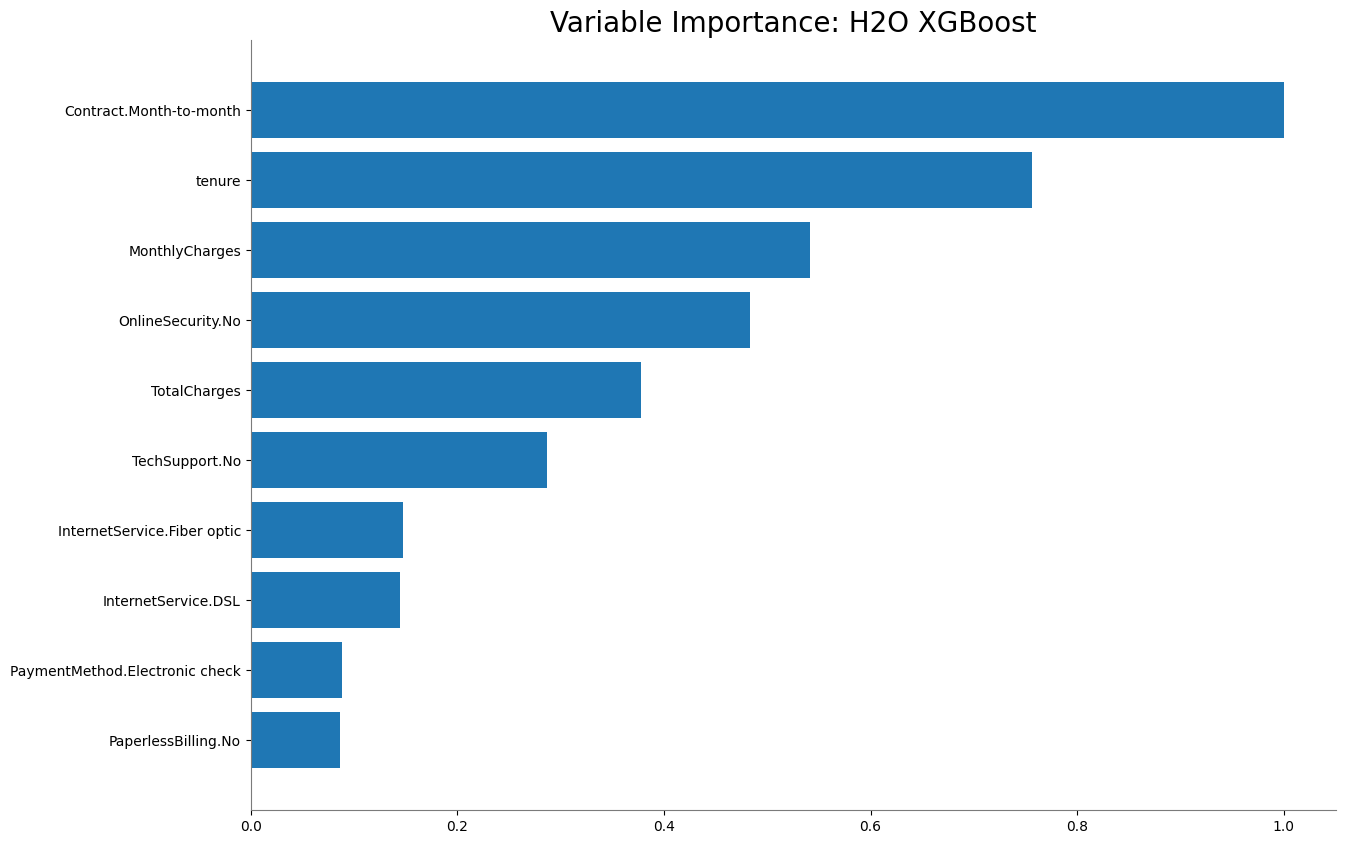

<Figure size 640x480 with 0 Axes>

In [31]:
out.varimp_plot()

In [32]:
aml.leader.download_mojo(path = "./")

'/content/GBM_1_AutoML_1_20250222_83834.zip'